# Usage: scenario analysis
This is a quick tour of CovsirPhy. Details scenario analysis will be explained.
"Scenario analysis" means that we calculate the number of cases in the future phases with some sets of ODE parameter values. With this analysis, we can estimate the impact of our activities against the outbreak on the number of cases.

### Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-delta'

### Dataset preparation
Download the datasets to "input" direcotry and load them.  
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Please set verbose=2 to see the detailed citation list.




Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


### Start scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

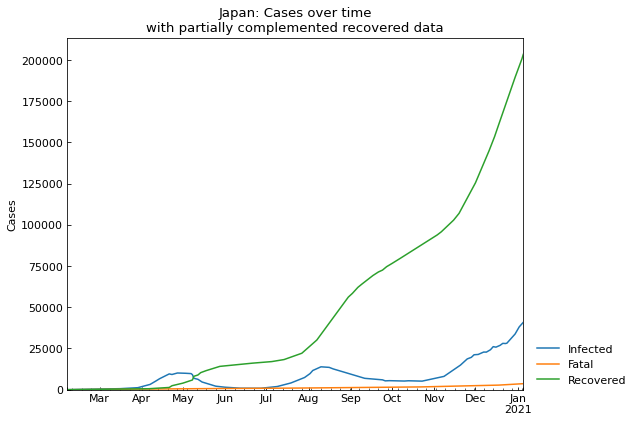

,Date,Infected,Fatal,Recovered
330,2021-01-01,37221,3460,193714
331,2021-01-02,38078,3514,196420
332,2021-01-03,38920,3548,198486
333,2021-01-04,39572,3599,200676
334,2021-01-05,40884,3655,203421


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of daily new cases with `Scenario.record_diff()` method.

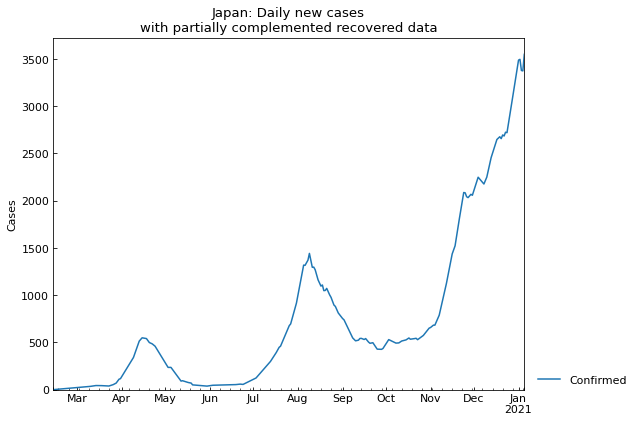

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

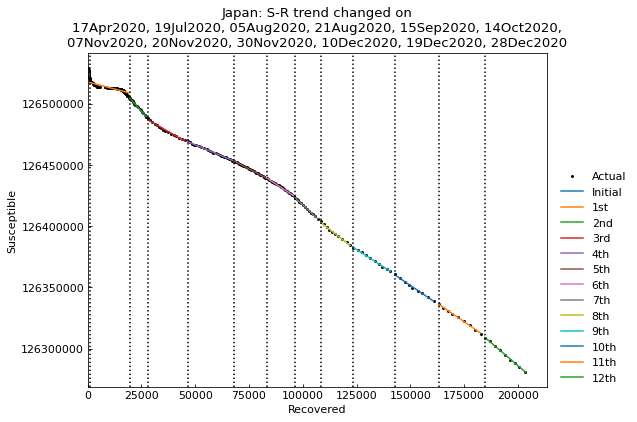

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,18Jul2020,126529100
2nd,Past,19Jul2020,04Aug2020,126529100
3rd,Past,05Aug2020,20Aug2020,126529100
4th,Past,21Aug2020,14Sep2020,126529100
5th,Past,15Sep2020,13Oct2020,126529100
6th,Past,14Oct2020,06Nov2020,126529100
7th,Past,07Nov2020,19Nov2020,126529100
8th,Past,20Nov2020,29Nov2020,126529100
9th,Past,30Nov2020,09Dec2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	10th phase (10Dec2020 - 18Dec2020): finished  257 trials in 0 min 10 sec


	 9th phase (21Aug2020 - 14Sep2020): finished  529 trials in 0 min 20 sec

	 4th phase (30Nov2020 - 09Dec2020): finished  533 trials in 0 min 20 sec

	 8th phase (28Dec2020 - 05Jan2021): finished 1384 trials in 1 min  0 sec

	12th phase (19Dec2020 - 27Dec2020): finished 2823 trials in 3 min  0 sec

	 6th phase (19Jul2020 - 04Aug2020): finished 2842 trials in 3 min  0 sec

	 5th phase (07Nov2020 - 19Nov2020): finished  552 trials in 0 min 20 sec

	 3rd phase (06Feb2020 - 16Apr2020): finished 2704 trials in 3 min  1 sec

	11th phase (17Apr2020 - 18Jul2020): finished 2651 trials in 3 min  0 sec

	 7th phase (15Sep2020 - 13Oct2020): finished  502 trials in 0 min 20 sec

	 1st phase (05Aug2020 - 20Aug2020): finished 2998 trials in 3 min  0 sec

	 0th phase (14Oct2020 - 06Nov2020): finished 2997 trials in 3 min  0 sec

	 2nd phase (20Nov2020 - 29Nov2020): finished 3162 trials in 3 min  0 sec

Completed optimization. Total: 7 min 12 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.20,0.000122,0.000598,0.026248,0.005647,360,417,0.000,44,9,0.259875,2704,3 min 1 sec
1st,Past,17Apr2020,18Jul2020,126529100,SIR-F,0.55,0.052949,0.000367,0.007771,0.013036,360,681,0.053,19,32,0.380003,2651,3 min 0 sec
2nd,Past,19Jul2020,04Aug2020,126529100,SIR-F,1.92,0.000446,0.000084,0.033069,0.017094,360,2990,0.000,14,7,0.019996,2842,3 min 0 sec
3rd,Past,05Aug2020,20Aug2020,126529100,SIR-F,1.12,0.000029,0.000130,0.022355,0.019886,360,1920,0.000,12,11,0.039670,2998,3 min 0 sec
4th,Past,21Aug2020,14Sep2020,126529100,SIR-F,0.75,0.016254,0.000005,0.019403,0.025390,360,54820,0.016,9,12,0.019176,529,0 min 20 sec
5th,Past,15Sep2020,13Oct2020,126529100,SIR-F,0.89,0.000121,0.000294,0.022376,0.024711,360,849,0.000,10,11,0.029018,502,0 min 20 sec
6th,Past,14Oct2020,06Nov2020,126529100,SIR-F,1.08,0.000664,0.000254,0.027670,0.025294,360,982,0.001,9,9,0.035278,2997,3 min 0 sec
7th,Past,07Nov2020,19Nov2020,126529100,SIR-F,1.59,0.000938,0.000256,0.034372,0.021333,360,978,0.001,11,7,0.011727,552,0 min 20 sec
8th,Past,20Nov2020,29Nov2020,126529100,SIR-F,1.52,0.000291,0.000230,0.029466,0.019205,360,1085,0.000,13,8,0.024099,3162,3 min 0 sec
9th,Past,30Nov2020,09Dec2020,126529100,SIR-F,1.11,0.000427,0.000361,0.025541,0.022566,360,692,0.000,11,9,0.010513,533,0 min 20 sec


### Accuracy of estimation

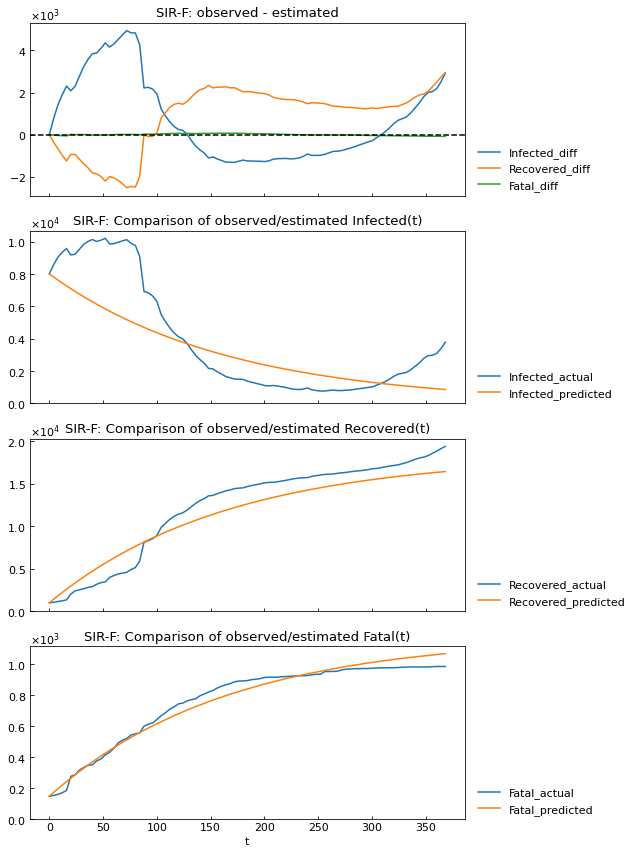

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value
We can get the parameter values of a phase using `Scenario.get()` method.

In [12]:
snl.get("Rt", phase="4th")

0.75

### Show parameter history
`Scenario.history()` method shows the trajectories of parameters (and the number of cases).

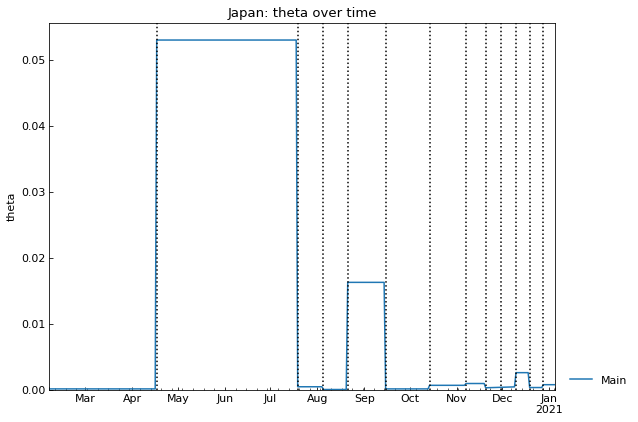

In [13]:
_ = snl.history(target="theta")

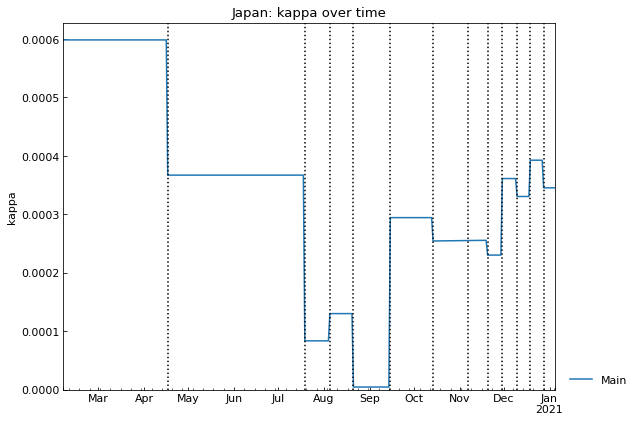

In [14]:
_ = snl.history(target="kappa")

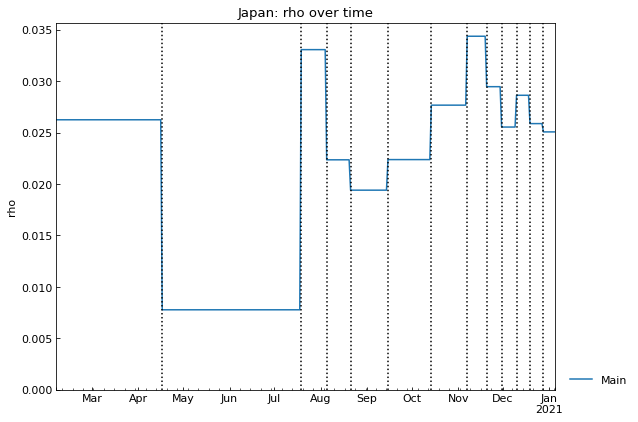

In [15]:
_ = snl.history(target="rho")

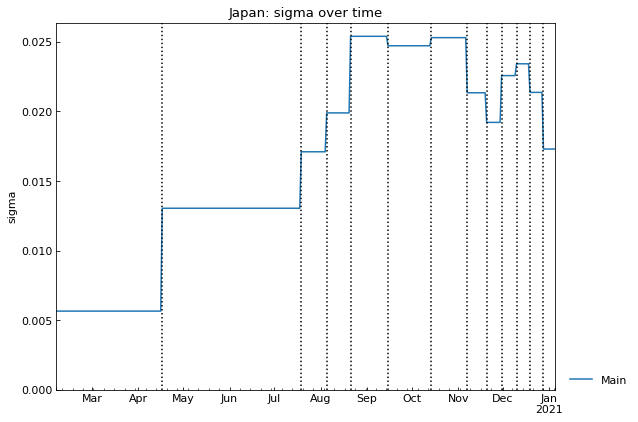

In [16]:
_ = snl.history(target="sigma")

Notes on the history of $\sigma$ value in japan (last updated: 28Dec2020):  
In Japan, we experienced two waves and we are in third wave. In the first wave (Apr - May), recovery period was too long because collapse of the medical care system occurred and no medicines were found.

Sigma values: the first wave < the second wave > the third wave

However, in the second wave (Jul - Oct), recovery period appears short because we have some effective medicines (not approved, in clinical study), yonger people (people un-associated to sever diseases) were infected.

In the third wave (Nov - ), older people tend to be infected and we are facing with medical collapse at this time...

### Show the history of reproduction number
$R_0$ ("R naught") means "the average number of secondary infections caused by an infected host" ([Infection Modeling — Part 1](https://towardsdatascience.com/infection-modeling-part-1-87e74645568a)). When this value is larger than 1, the infection disease is outbreaking.

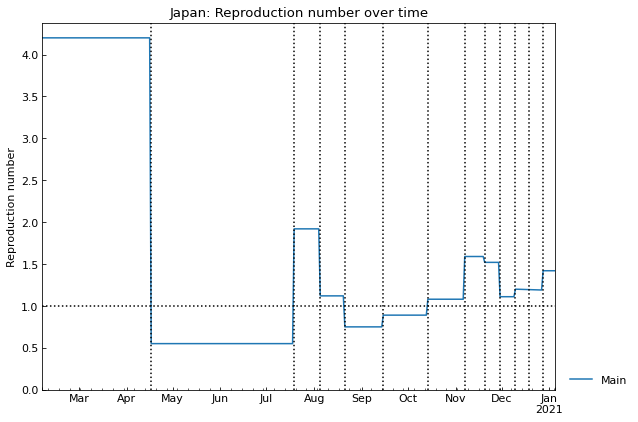

In [17]:
_ = snl.history(target="Rt")

### Simulate the number of cases
We can compare the actual and simulated (with estimated parameter values) number of confirmed/infected/recovered/fatal cases using `Scenario.history()` method.

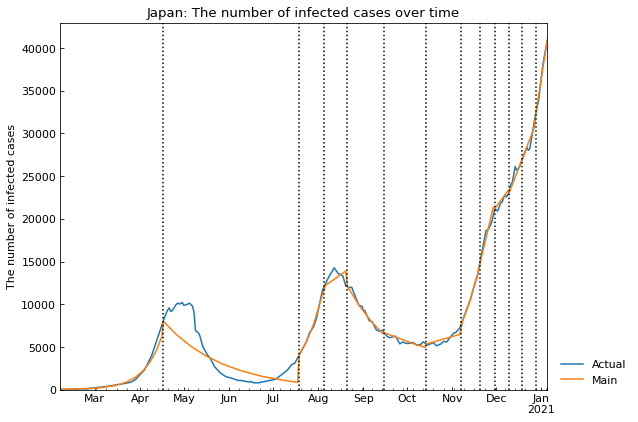

In [18]:
_ = snl.history("Infected")

### Main scenario
If the parameter velues will not be changed until 01Apr2021, how many cases will be? We call this scenario as "Main" scenario.

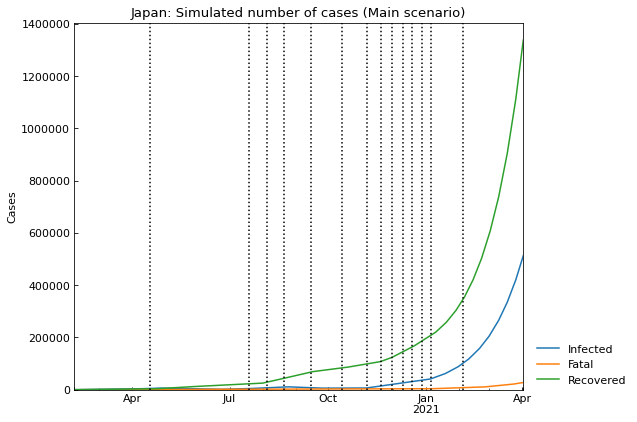

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,1685759,24706,457914,1203139
418,2021-03-30,1731704,25383,471059,1235262
419,2021-03-31,1778949,26079,484564,1268306
420,2021-04-01,1827528,26794,498437,1302297
421,2021-04-02,1877479,27531,512688,1337260


In [19]:
# Clear future phases in Main scenario
snl.clear(name="Main")
# Add one future phase 30 days with the parameter set of the last past phase
snl.add(days=30)
# Add one future phase until 01Apr2021 with the same parameter set
snl.add(end_date="01Apr2021", name="Main")
# Simulate the number of cases
snl.simulate(name="Main").tail()

### Medicine scenario
If $\sigma$ will be double in 30 days, how many cases will be? We will call this scenario as "Medicine" scenario.

In [20]:
# Calcuate the current sigma value of the last phase
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.017290466512273506

In [21]:
# Sigma value will be double
sigma_new = sigma_current * 2
sigma_new

0.03458093302454701

In [22]:
# Initialize "Medicine" scenario (with the same past phases as that of Main scenario)
snl.clear(name="Medicine")
# Add 30 days as a new future phases with the same parameter set
snl.add(name="Medicine", days=30, sigma=sigma_current)
# Add a phase until 01Apr2021 with doubled sigma value
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary(name="Medicine")

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.20,0.000122,0.000598,0.026248,0.005647,360,417,0.000,44,9,0.259875,2704,3 min 1 sec
1st,Past,17Apr2020,18Jul2020,126529100,SIR-F,0.55,0.052949,0.000367,0.007771,0.013036,360,681,0.053,19,32,0.380003,2651,3 min 0 sec
2nd,Past,19Jul2020,04Aug2020,126529100,SIR-F,1.92,0.000446,0.000084,0.033069,0.017094,360,2990,0.000,14,7,0.0199958,2842,3 min 0 sec
3rd,Past,05Aug2020,20Aug2020,126529100,SIR-F,1.12,0.000029,0.000130,0.022355,0.019886,360,1920,0.000,12,11,0.0396699,2998,3 min 0 sec
4th,Past,21Aug2020,14Sep2020,126529100,SIR-F,0.75,0.016254,0.000005,0.019403,0.025390,360,54820,0.016,9,12,0.0191764,529,0 min 20 sec
5th,Past,15Sep2020,13Oct2020,126529100,SIR-F,0.89,0.000121,0.000294,0.022376,0.024711,360,849,0.000,10,11,0.0290184,502,0 min 20 sec
6th,Past,14Oct2020,06Nov2020,126529100,SIR-F,1.08,0.000664,0.000254,0.027670,0.025294,360,982,0.001,9,9,0.0352777,2997,3 min 0 sec
7th,Past,07Nov2020,19Nov2020,126529100,SIR-F,1.59,0.000938,0.000256,0.034372,0.021333,360,978,0.001,11,7,0.0117272,552,0 min 20 sec
8th,Past,20Nov2020,29Nov2020,126529100,SIR-F,1.52,0.000291,0.000230,0.029466,0.019205,360,1085,0.000,13,8,0.0240993,3162,3 min 0 sec
9th,Past,30Nov2020,09Dec2020,126529100,SIR-F,1.11,0.000427,0.000361,0.025541,0.022566,360,692,0.000,11,9,0.0105131,533,0 min 20 sec


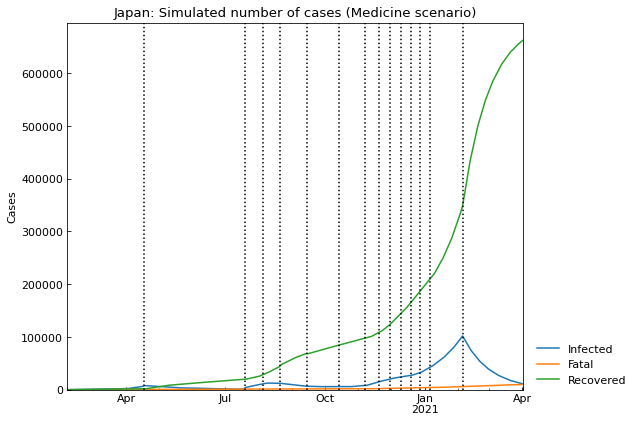

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,678900,9941,12741,656218
418,2021-03-30,680139,9959,12243,657937
419,2021-03-31,681331,9977,11764,659590
420,2021-04-01,682477,9993,11304,661180
421,2021-04-02,683582,10010,10861,662711


In [23]:
# Simulate the number of cases
snl.simulate(name="Medicine").tail()

### Short-term prediction of parameter values
With OxCGRT data, we can predict the parameter values of the future phases because [OxCGRT indicators](https://github.com/OxCGRT/covid-policy-tracker) (policy measures) impact on parameter values with delay (=recovery period).  

OxCGRT indicators are

- school_closing,
- workplace_closing,
- cancel_events, 
- gatherings_restrictions,
- transport_closing,
- stay_home_restrictions,
- internal_movement_restrictions,
- international_movement_restrictions,
- information_campaigns,
- testing_policy, and
- contact_tracing.

In [24]:
# Fitting with linear regression model (Elastic Net regression)
fit_dict = snl.fit(oxcgrt_data=oxcgrt_data, name="Forecast")
print(f"Determination coefficient: {fit_dict['score_train']} (train)")
print(f"Determination coefficient: {fit_dict['score_test']} (test)")
print("Intercept:")
fit_dict["intercept"].style.background_gradient(axis=None)

Determination coefficient: 0.7387383065857227 (train)
Determination coefficient: 0.7714416286073656 (test)
Intercept:


,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing
theta,0.006541,0.055486,-0.041335,0.000000,-0.000123,0.036821,0.001230,0.008249,-0.002040,-0.053877,0.042974
kappa,0.000120,-0.000273,0.000197,0.000000,-0.000018,-0.000176,-0.000003,-0.000062,0.000028,-0.000258,0.000462
rho,-0.002641,-0.019624,0.014151,0.000000,-0.002501,-0.013059,0.000298,-0.002483,0.000424,0.020199,-0.015478
sigma,-0.005292,0.008207,-0.002614,0.000000,-0.004715,0.008860,-0.005470,-0.002653,0.002430,0.010590,-0.007145


In [25]:
# Short-term prediction
snl.predict(name="Forecast").summary(name="Forecast")

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.20,0.000122,0.000598,0.026248,0.005647,360,417,0.000,44,9,0.259875,2704,3 min 1 sec
1st,Past,17Apr2020,18Jul2020,126529100,SIR-F,0.55,0.052949,0.000367,0.007771,0.013036,360,681,0.053,19,32,0.380003,2651,3 min 0 sec
2nd,Past,19Jul2020,04Aug2020,126529100,SIR-F,1.92,0.000446,0.000084,0.033069,0.017094,360,2990,0.000,14,7,0.0199958,2842,3 min 0 sec
3rd,Past,05Aug2020,20Aug2020,126529100,SIR-F,1.12,0.000029,0.000130,0.022355,0.019886,360,1920,0.000,12,11,0.0396699,2998,3 min 0 sec
4th,Past,21Aug2020,14Sep2020,126529100,SIR-F,0.75,0.016254,0.000005,0.019403,0.025390,360,54820,0.016,9,12,0.0191764,529,0 min 20 sec
5th,Past,15Sep2020,13Oct2020,126529100,SIR-F,0.89,0.000121,0.000294,0.022376,0.024711,360,849,0.000,10,11,0.0290184,502,0 min 20 sec
6th,Past,14Oct2020,06Nov2020,126529100,SIR-F,1.08,0.000664,0.000254,0.027670,0.025294,360,982,0.001,9,9,0.0352777,2997,3 min 0 sec
7th,Past,07Nov2020,19Nov2020,126529100,SIR-F,1.59,0.000938,0.000256,0.034372,0.021333,360,978,0.001,11,7,0.0117272,552,0 min 20 sec
8th,Past,20Nov2020,29Nov2020,126529100,SIR-F,1.52,0.000291,0.000230,0.029466,0.019205,360,1085,0.000,13,8,0.0240993,3162,3 min 0 sec
9th,Past,30Nov2020,09Dec2020,126529100,SIR-F,1.11,0.000427,0.000361,0.025541,0.022566,360,692,0.000,11,9,0.0105131,533,0 min 20 sec


In [26]:
# Or, when you do not need 'fit_dict'
# snl.fit_predict(oxcgrt_data=oxcgrt_data, name="Forecast").summary(name="Forecast")

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [27]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,Confirmed on 23Jan2021,Infected on 23Jan2021,Fatal on 23Jan2021,13th_Rt,14th_Rt
Main,512688,02Apr2021,1877479.0,512688.0,27531.0,NaN,NaN,NaN,1.42,1.42
Medicine,101755,05Feb2021,683582.0,10861.0,10010.0,NaN,NaN,NaN,1.42,0.72
Forecast,64730,23Jan2021,NaN,NaN,NaN,338303.0,64730.0,5406.0,1.32,1.38


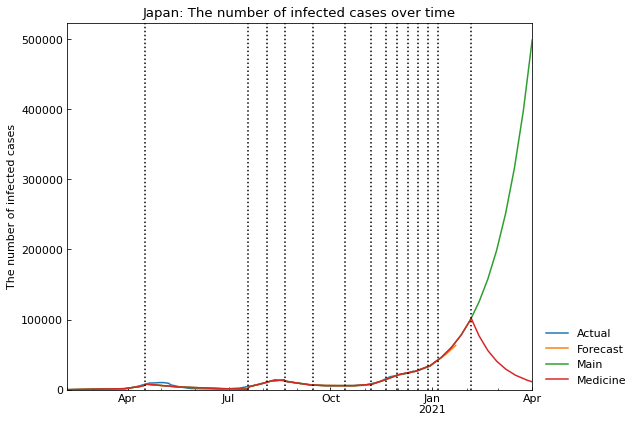

In [28]:
_ = snl.history(target="Infected")

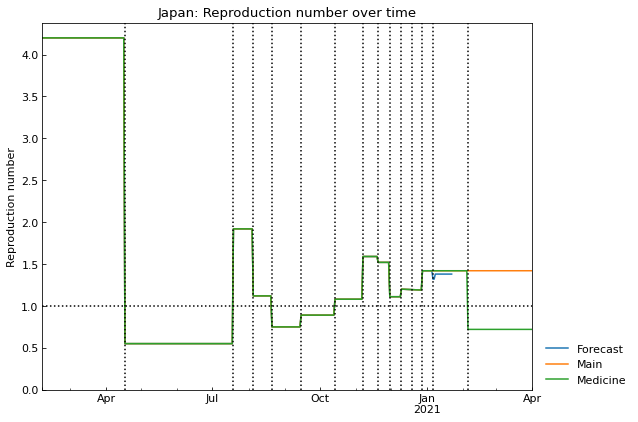

In [29]:
_ = snl.history(target="Rt")

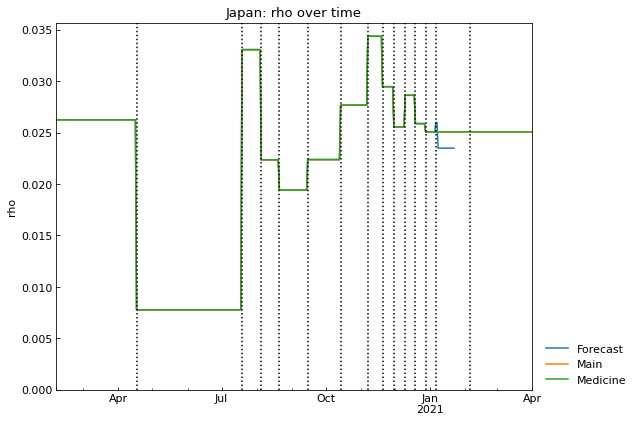

In [30]:
_ = snl.history(target="rho")

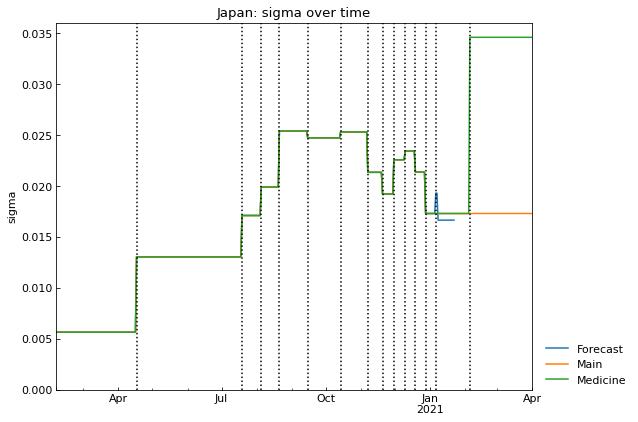

In [31]:
_ = snl.history(target="sigma")

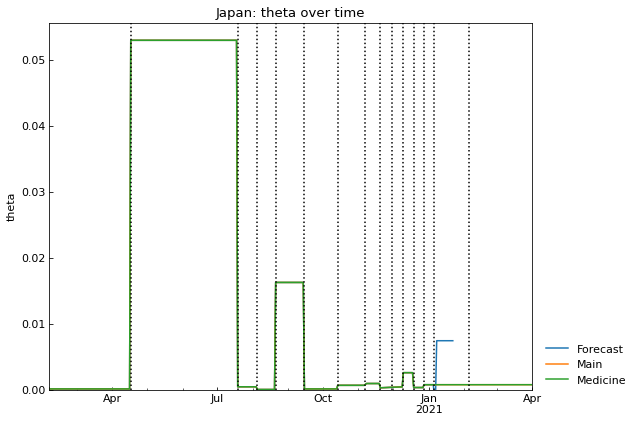

In [32]:
_ = snl.history(target="theta")

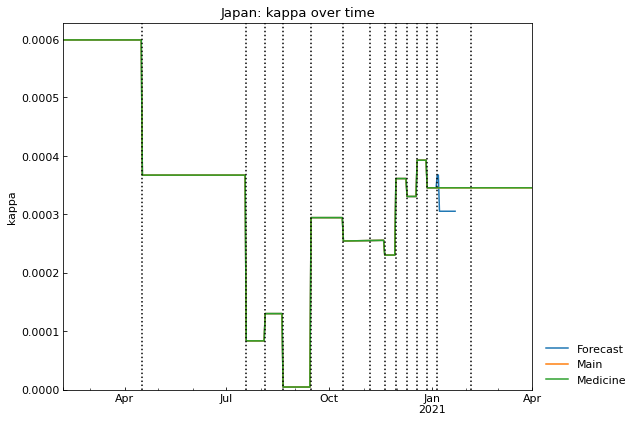

In [33]:
_ = snl.history(target="kappa")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

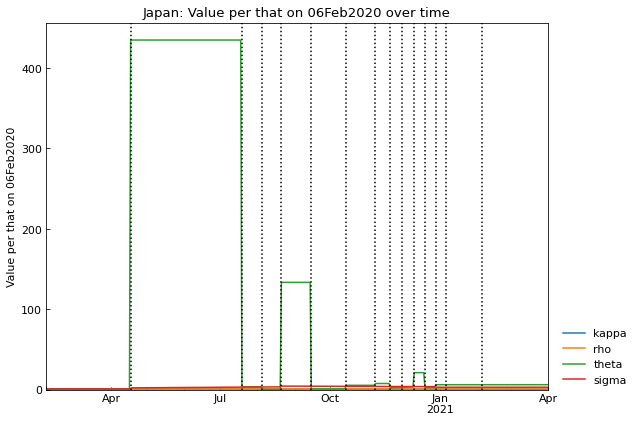

In [34]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [35]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	10th phase (10Dec2020 - 18Dec2020): finished  270 trials in 0 min 10 sec


	 9th phase (01Sep2020 - 14Sep2020): finished  221 trials in 0 min 10 sec

	 8th phase (21Aug2020 - 31Aug2020): finished  631 trials in 0 min 30 sec

	 4th phase (30Nov2020 - 09Dec2020): finished  637 trials in 0 min 30 sec

	 3rd phase (28Dec2020 - 05Jan2021): finished 1447 trials in 1 min 20 sec

	12th phase (19Dec2020 - 27Dec2020): finished 2619 trials in 3 min  0 sec

	 6th phase (19Jul2020 - 04Aug2020): finished 2607 trials in 3 min  0 sec

	 5th phase (07Nov2020 - 19Nov2020): finished  377 trials in 0 min 20 sec

	11th phase (06Feb2020 - 16Apr2020): finished 2498 trials in 3 min  0 sec

	 7th phase (15Sep2020 - 13Oct2020): finished  489 trials in 0 min 30 sec

	 1st phase (17Apr2020 - 18Jul2020): finished 2305 trials in 3 min  1 sec

	13th phase (05Aug2020 - 20Aug2020): finished 2344 trials in 3 min  1 sec

	 0th phase (14Oct2020 - 06Nov2020): finished 2355 trials in 3 min  1 sec

	 2nd phase (20Nov2020 - 29Nov2020): finished 2537 trials in 3 min  0 sec

Completed optimization. Total: 7 min 23 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 2nd phase (01Sep2020 - 05Jan2021): finished 8999 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [36]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.20  0.000122  0.000598   
              1st    17Apr2020  18Jul2020  SIR-F  0.55  0.052949  0.000367   
              2nd    19Jul2020  04Aug2020  SIR-F  1.92  0.000446  0.000084   
              3rd    05Aug2020  20Aug2020  SIR-F  1.10  0.002207  0.000093   
              4th    21Aug2020  31Aug2020  SIR-F  0.80  0.000121  0.000294   
              5th    01Sep2020  14Sep2020  SIR-F  0.72  0.019123  0.000014   
              6th    15Sep2020  13Oct2020  SIR-F  0.89  0.000121  0.000294   
              7th    14Oct2020  06Nov2020  SIR-F  1.08  0.000664  0.000254   
              8th    07Nov2020  19Nov2020  SIR-F  1.59  0.002622  0.000198   
              9th    20Nov2020  29Nov2020  SIR-F  1.52  0.000291  0.000230   
              10th   30Nov2020  09Dec2020  SIR-F  1.11  0.000427  0.000361   
              11th   10Dec2020  18Dec2020  SIR-F  1.20  0.002581  0.000331   
              12th   19Dec2020  27Dec2020  SIR-F  1.19  0.000328  0.000393   
              13th   28Dec2020  05Jan2021  SIR-F  1.42  0.000758  0.000345   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.20  0.000122  0.000598   
              1st    17Apr2020  18Jul2020  SIR-F  0.55  0.052949  0.000367   
              2nd    19Jul2020  04Aug2020  SIR-F  1.92  0.000446  0.000084   
              3rd    05Aug2020  20Aug2020  SIR-F  1.10  0.002207  0.000093   
              4th    21Aug2020  31Aug2020  SIR-F  0.80  0.000121  0.000294   
              5th    01Sep2020  05Jan2021  SIR-F  0.80  0.000121  0.000294   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.026248  0.005647  0.259875    2498  3 min  0 sec  
              1st    0.007771  0.013036  0.380003    2305  3 min  1 sec  
              2nd    0.033069  0.017094  0.019996    2607  3 min  0 sec  
              3rd    0.022273  0.020061  0.039883    2344  3 min  1 sec  
              4th    0.019126  0.023584  0.017947     631  0 min 30 sec  
              5th    0.018468  0.025125  0.016927     221  0 min 10 sec  
              6th    0.022376  0.024711  0.029018     489  0 min 30 sec  
              7th    0.027670  0.025294  0.035278    2355  3 min  1 sec  
              8th    0.034142  0.021225  0.012558     377  0 min 20 sec  
              9th    0.029466  0.019205  0.024099    2537  3 min  0 sec  
              10th   0.025541  0.022566  0.010513     637  0 min 30 sec  
              11th   0.028630  0.023415  0.013868     270  0 min 10 sec  
              12th   0.025876  0.021361  0.011225    2619  3 min  0 sec  
              13th   0.025069  0.017290  0.007531    1447  1 min 20 sec  
Retrospective 0th    0.026248  0.005647  0.259875    2498  3 min  0 sec  
              1st    0.007771  0.013036  0.380003    2305  3 min  1 sec  
              2nd    0.033069  0.017094  0.019996    2607  3 min  0 sec  
              3rd    0.022273  0.020061  0.039883    2344  3 min  1 sec  
              4th    0.019126  0.023584  0.017947     631  0 min 30 sec  
              5th    0.019126  0.023584  1.123756    8999  3 min  0 sec

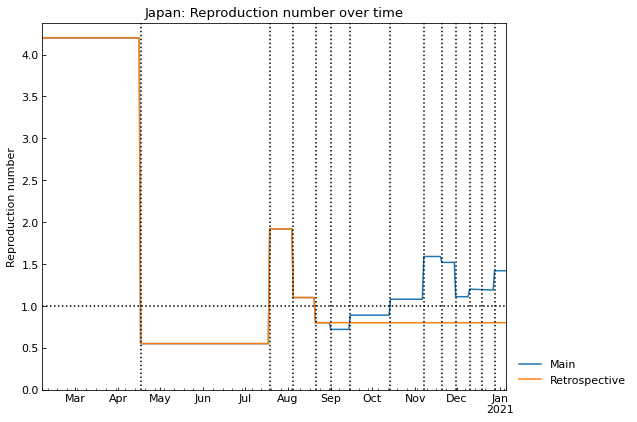

In [37]:
# History of reproduction number
_ = snl_retro.history("Rt")

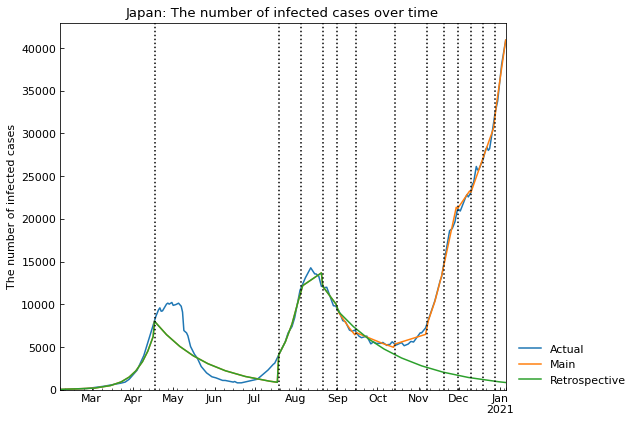

In [38]:
# History of Infected
_ = snl_retro.history("Infected")

In [39]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 06Jan2021,Infected on 06Jan2021,Fatal on 06Jan2021,5th_Rt,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt,13th_Rt
Main,42139,06Jan2021,253578,42139,3737,0.72,0.89,1.08,1.59,1.52,1.11,1.2,1.19,1.42
Retrospective,13668,20Aug2020,102262,825,1821,0.80,-,-,-,-,-,-,-,-
